<a href="https://colab.research.google.com/github/divyaseri/divya_INFO5731_Fall2020/blob/master/INFO5731_Assignment_four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


In [ ]:
import json
import pandas as pd

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_json (r'/content/yelp_dataset~1.json')
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,vNHdIY_wU_btRuHK3HMCgQ,mXBkddhNdHjw4vRmo7X8Hg,XWxYHSld0T2TfANwt1KmqA,5,0,0,0,We love Cafe Americano! We've been a couple ti...,2018-08-24 00:20:02
1,B_1HqrwINKkIEnekkxtpsA,1kNsEAhGU8d8xugMuXJGFA,cDoo0Pf1d_P79Rq3ZNk-Mw,3,1,0,0,"Sigh. This review was tough to give, as it cou...",2013-07-13 00:57:45
2,x_AWd7i9NVCCynAyvk99VQ,U4INQZOPSUaj8hMjLlZ3KA,pKOy7-pP-BdSVcCrtQo_ww,5,3,0,1,This is a review of Pliner's approach and styl...,2011-01-08 22:46:24
3,k29ZobahoFGWPePsxd35Ng,YthHssImvAsOjE2AWWmg6w,6Cl15LapBVhw4ZfBIeVJJA,5,0,0,0,Absolutely delicious. Ordered chicken/beef kab...,2016-01-30 03:24:38
4,MS5Qm98MZOb747tkObIP8w,pvXNlamX78K_fQVUz8C3sw,NIPn7olHs6k3Svxy6DHUQA,3,0,0,0,Really good steak house. Steak is always seaso...,2014-12-17 19:48:47


In [99]:
df1 =df.drop(['review_id','user_id','business_id','review_id','date','useful','funny','cool'],axis =1)
df1.head()

,stars,text
0,5,We love Cafe Americano! We've been a couple ti...
1,3,"Sigh. This review was tough to give, as it cou..."
2,5,This is a review of Pliner's approach and styl...
3,5,Absolutely delicious. Ordered chicken/beef kab...
4,3,Really good steak house. Steak is always seaso...


In [ ]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def text_clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [101]:
df1['cleaned text']=df1['text'].apply(text_clean)
df1

,stars,text,cleaned text
0,5,We love Cafe Americano! We've been a couple ti...,"[love, cafe, americano, weve, couple, time, lu..."
1,3,"Sigh. This review was tough to give, as it cou...","[sigh, review, tough, give, couldve, anywhere,..."
2,5,This is a review of Pliner's approach and styl...,"[review, pliners, approach, style, truly, orig..."
3,5,Absolutely delicious. Ordered chicken/beef kab...,"[absolutely, delicious, ordered, chickenbeef, ..."
4,3,Really good steak house. Steak is always seaso...,"[really, good, steak, house, steak, always, se..."
...,...,...,...
95,4,Surprised they didn't open earlier in a Sunday...,"[surprised, open, earlier, sunday, worth, wait..."
96,5,Finding a solid spot to get a quality cut can ...,"[finding, solid, spot, get, quality, cut, chal..."
97,5,ATTENTION DOWNTown: this place has amazing foo...,"[attention, downtown, place, amazing, food, co..."
98,5,A new fav for sure!!! Loving the concept of bu...,"[new, fav, sure, loving, concept, building, bo..."


In [ ]:
dictionary = corpora.Dictionary(df1['cleaned text'])
print('sum of the number of unique words per document:')
print(dictionary.num_nnz)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in df1['cleaned text'] ]
print('Term document matrix')
print(len(doc_term_matrix))

sum of the number of unique words per document:
5275
Term document matrix
100


In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=84959ce34873a0ade09a9e136d61d06126984cec97802a2ed1d6988029ad2bc5
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import warnings
warnings.simplefilter('ignore')
from itertools import chain

In [ ]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim 

In [ ]:
lda = gensim.models.ldamodel.LdaModel

In [ ]:
num_topics=20
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

CPU times: user 4.41 s, sys: 0 ns, total: 4.41 s
Wall time: 4.42 s


In [ ]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.012*"bond" + 0.009*"talking" + 0.009*"lettuce" + 0.007*"company" + 0.007*"reply" + 0.007*"call" + 0.007*"ticket" + 0.007*"shoe" + 0.007*"person" + 0.007*"bail"'),
 (1,
  '0.012*"favorite" + 0.012*"really" + 0.012*"great" + 0.012*"place" + 0.009*"combo" + 0.009*"manager" + 0.009*"facility" + 0.009*"unit" + 0.009*"get" + 0.009*"always"'),
 (2,
  '0.010*"car" + 0.010*"im" + 0.010*"part" + 0.010*"need" + 0.010*"go" + 0.010*"porsche" + 0.010*"968" + 0.005*"next" + 0.005*"directly" + 0.005*"something"'),
 (3,
  '0.022*"food" + 0.011*"love" + 0.010*"went" + 0.010*"time" + 0.010*"chicken" + 0.010*"restaurant" + 0.010*"quality" + 0.008*"service" + 0.008*"great" + 0.008*"sauce"'),
 (4,
  '0.013*"game" + 0.010*"better" + 0.010*"really" + 0.010*"out" + 0.010*"made" + 0.010*"spring" + 0.010*"training" + 0.007*"come" + 0.007*"butter" + 0.007*"bread"'),
 (5,
  '0.017*"food" + 0.017*"time" + 0.013*"nice" + 0.013*"love" + 0.009*"place" + 0.009*"recommend" + 0.009*"ive" + 0.009*"amazing" + 0.0

In [ ]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

## HMM-LDA

In [ ]:
import nltk
nltk.download('reuters')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import logging
from ptm.nltk_corpus import get_reuters_token_list_by_sentence
from ptm import HMM_LDA
from ptm.utils import get_top_words

logger = logging.getLogger('HMM_LDA')
logger.propagate=False

In [ ]:
n_docs = 100
voca, corpus = get_reuters_token_list_by_sentence(num_doc=n_docs)
print('Vocabulary size', len(voca))

Vocabulary size 1639


In [ ]:
n_docs = len(corpus)
n_voca = len(voca)
n_topic = 20
n_class = 15
max_iter = 100
alpha = 0.1
beta = 0.01
gamma = 0.1
eta = 0.1
model = HMM_LDA(n_docs, n_voca, n_topic, n_class, alpha=alpha, beta=beta, gamma=gamma, eta=eta, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [ ]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

Topic 0 :  energy,said,a,boost,much,also,on,comparable,cheap,partnership
Topic 1 :  but,days,century,reiterated,for,cheaply,term,review,arrival,palm
Topic 2 :  its,although,it,production,also,for,conditioned,whether,tender,a
Topic 3 :  without,economy,production,other,white,share,decline,geared,divided,in
Topic 4 :  currency,two,stocks,weak,to,bank,would,statement,analyst,electronics
Topic 5 :  where,it,economy,or,to,drop,share,be,plan,will
Topic 6 :  not,quarter,palm,also,five,policy,in,matter,is,and
Topic 7 :  off,volatility,a,added,official,unless,there,meeting,as,paper
Topic 8 :  by,stability,loss,will,reduce,strengthening,acknowledged,to,food,dividend
Topic 9 :  maintenance,site,or,on,their,pit,preservation,steel,already,said
Topic 10 :  operate,is,its,later,on,too,dinar,it,area,spokesman
Topic 11 :  market,although,factor,which,significantly,it,before,for,being,at
Topic 12 :  an,dollar,incoming,for,government,a,each,said,as,cereal
Topic 13 :  if,issue,were,kilowatt,effective,deve

# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [122]:
df1 =df.drop(['review_id','user_id','business_id','review_id','date','useful','funny','cool'],axis =1)

In [123]:
df1.loc[df1['stars']==5,'stars'] = 'very positive' #5
df1.loc[df1['stars']==4,'stars'] = 'positive' #4
df1.loc[df1['stars']==3,'stars'] = 'neutral' #3
df1.loc[df1['stars']==2,'stars'] = 'negative' #2
df1.loc[df1['stars']==1,'stars'] = 'very negative' #1

In [126]:
import re
#removing punctuations
df1['text']=df1['text'].map(lambda x: re.sub('[?|!|\'|"|#]', '', x))
#lower
df1['text']=df1['text'].map(lambda x: x.lower())
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
words = stopwords.words('english')
from textblob import Word
from textblob import TextBlob
nltk.download('punkt')
nltk.download('wordnet')

df1['text']=df1['text'].apply(lambda x:" ".join(x for x in x.split() if x not in words))
df1['text']=df1['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df1.head(100)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,stars,text
0,very positive,love cafe americano weve couple time lunch eri...
1,neutral,"sigh. review tough give, couldve anywhere 2 4 ..."
2,very positive,"review pliners approach style (truly original,..."
3,very positive,absolutely delicious. ordered chicken/beef kab...
4,neutral,really good steak house. steak always seasoned...
...,...,...
95,positive,surprised open earlier sunday worth wait get i...
96,very positive,finding solid spot get quality cut challenge s...
97,very positive,attention downtown: place amazing food. compli...
98,very positive,new fav sure loving concept building bowl vari...


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['text'])
print(X_tfidf.shape)

(100, 2247)


In [128]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mnb = MultinomialNB()
svm = LinearSVC()

In [130]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, df['stars'], test_size=0.2, random_state=42)
model_mnb = mnb.fit(x_train,y_train)

MultinomialNB

In [145]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 0.5
               precision    recall  f1-score   support

     negative       0.00      0.00      0.00         3
      neutral       0.00      0.00      0.00         2
     positive       0.00      0.00      0.00         3
very negative       0.00      0.00      0.00         2
very positive       0.50      1.00      0.67        10

     accuracy                           0.50        20
    macro avg       0.10      0.20      0.13        20
 weighted avg       0.25      0.50      0.33        20



In [146]:
#Multinomial NB
from sklearn.model_selection import cross_val_score
scoresMNB = cross_val_score(mnb, x_test, y_test, cv=10)
print(" Accuracy using MNB",scoresMNB.mean())

 Accuracy using MNB 0.5


SVM


In [147]:
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))
print(classification_report(y_test,y_pred_svm))

Accuracy 0.5
               precision    recall  f1-score   support

     negative       0.00      0.00      0.00         3
      neutral       0.00      0.00      0.00         2
     positive       0.00      0.00      0.00         3
very negative       0.00      0.00      0.00         2
very positive       0.50      1.00      0.67        10

     accuracy                           0.50        20
    macro avg       0.10      0.20      0.13        20
 weighted avg       0.25      0.50      0.33        20



In [142]:
scoresSVM = cross_val_score(svm, x_test, y_test, cv=10)
print("Accuracy using svm",scoresSVM.mean())

Accuracy using svm 0.5


In [144]:
print("Accuracy using MNB",scoresMNB.mean())
print("Accuracy using svm",scoresSVM.mean())

Accuracy using MNB 0.5
Accuracy using svm 0.5


By comparing the performance over accuracy, precision, recall, and F1 score for the two algorithms Multinomial NB, SVM: The performance over accuracy, precision, recall, f1 score for this dataset is considered similar based on the result of accuracy score.


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [149]:
import pandas as pd
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
train_df['price per sq-area'] = train_df['SalePrice'] / train_df['LotArea']

In [151]:
%matplotlib inline

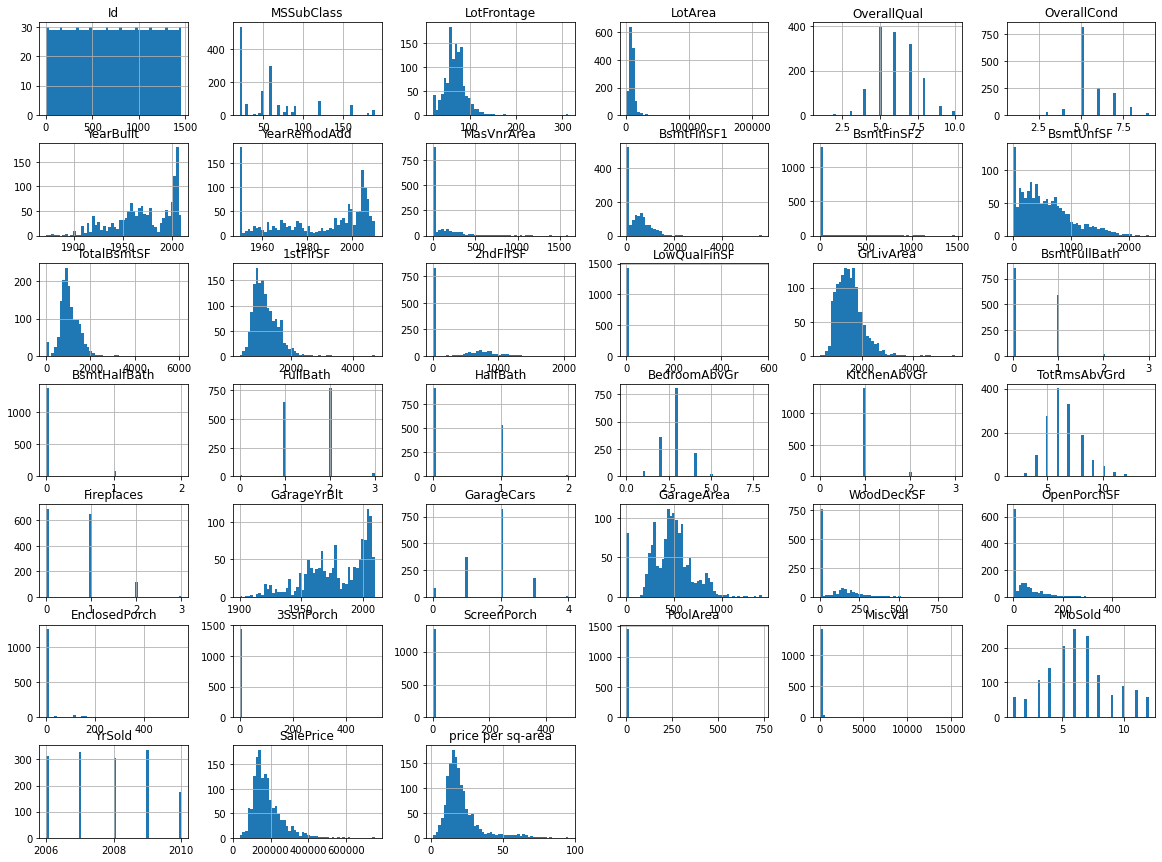

In [154]:
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [156]:
import numpy as np

# consider uniform features
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.fillna(999, inplace=True)

In [161]:
x = train_df[['LotFrontage', 'LotArea', 'GarageArea', 'GarageArea','GrLivArea']]
y = train_df['SalePrice']

In [162]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [164]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(x_test, y_test))

Linear Regression R squared: 0.5432


In [170]:
from sklearn.metrics import mean_squared_error
linear_mse = mean_squared_error(y_pred, y_test)
linear_rmse = np.sqrt(linear_mse)
print('Linear Regression RMSE: %.4f' % linear_rmse)

Linear Regression RMSE: 55690.8022


In [171]:
from sklearn.metrics import mean_absolute_error
linear_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % linear_mae)

Linear Regression MAE: 33944.0079
